In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Öklidyen mesafesi hesaplama
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Hiyerarşik kümeleme fonksiyonu
def hierarchical_clustering(data):
    # DataFrame'i NumPy dizisine dönüştür
    data_array = data.values

    n = len(data_array)
    clusters = {i: [i] for i in range(n)}  # Her veri kendi kümesi
    distances = np.zeros((n, n))           # Mesafe matrisi

    # Tüm mesafeleri hesapla
    for i in range(n):
        for j in range(i + 1, n):
            # data_array kullanarak satırlara eriş
            distances[i, j] = euclidean_distance(data_array[i], data_array[j])
            distances[j, i] = distances[i, j]

    linkage_matrix = []

    while len(clusters) > 1:
        # En yakın iki küme bulun
        min_dist = float('inf')
        cluster_pair = (None, None)
        keys = list(clusters.keys())

        for i in range(len(keys)):
            for j in range(i + 1, len(keys)):
                c1, c2 = keys[i], keys[j]
                dist = min(distances[p1, p2] for p1 in clusters[c1] for p2 in clusters[c2])
                if dist < min_dist:
                    min_dist = dist
                    cluster_pair = (c1, c2)

        # İki kümeyi birleştir
        c1, c2 = cluster_pair
        new_cluster = clusters[c1] + clusters[c2]
        new_cluster_id = max(clusters.keys()) + 1
        clusters[new_cluster_id] = new_cluster
        del clusters[c1]
        del clusters[c2]

        # Linkage matrisine ekle
        linkage_matrix.append([min(c1, c2), max(c1, c2), min_dist, len(new_cluster)])

    return np.array(linkage_matrix)




In [3]:
# Dendrogram çizim fonksiyonu
def plot_dendrogram(linkage_matrix, labels):
    plt.figure(figsize=(10, 8))
    current_positions = {i: (i, 0) for i in range(len(labels))}  # Her kümenin (x, y) koordinatları

    for i, (c1, c2, dist, _) in enumerate(linkage_matrix):
        # Alt kümelerin pozisyonlarını al
        x1, y1 = current_positions[c1]
        x2, y2 = current_positions[c2]
        y = dist  # Birleşme yüksekliği

        # Alt kümeler sıfıra inmesin, doğru yüksekliği kullan
        plt.plot([x1, x1, x2, x2], [y1, y, y, y2], c='royalblue', lw=2)

        # Yeni kümenin pozisyonunu güncelle
        current_positions[len(labels) + i] = ((x1 + x2) / 2, y)

    # Ekseni ve tasarımı ayarla
    plt.xticks(range(len(labels)), labels, fontsize=10)
    plt.title("Dendrogram ", fontsize=14, fontweight='bold')
    plt.xlabel("Veri Noktası", fontsize=12)
    plt.ylabel("Kümeleme Mesafesi", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()




Please Enter Your Dataset Path/content/KümelemeÖrnek1.csv


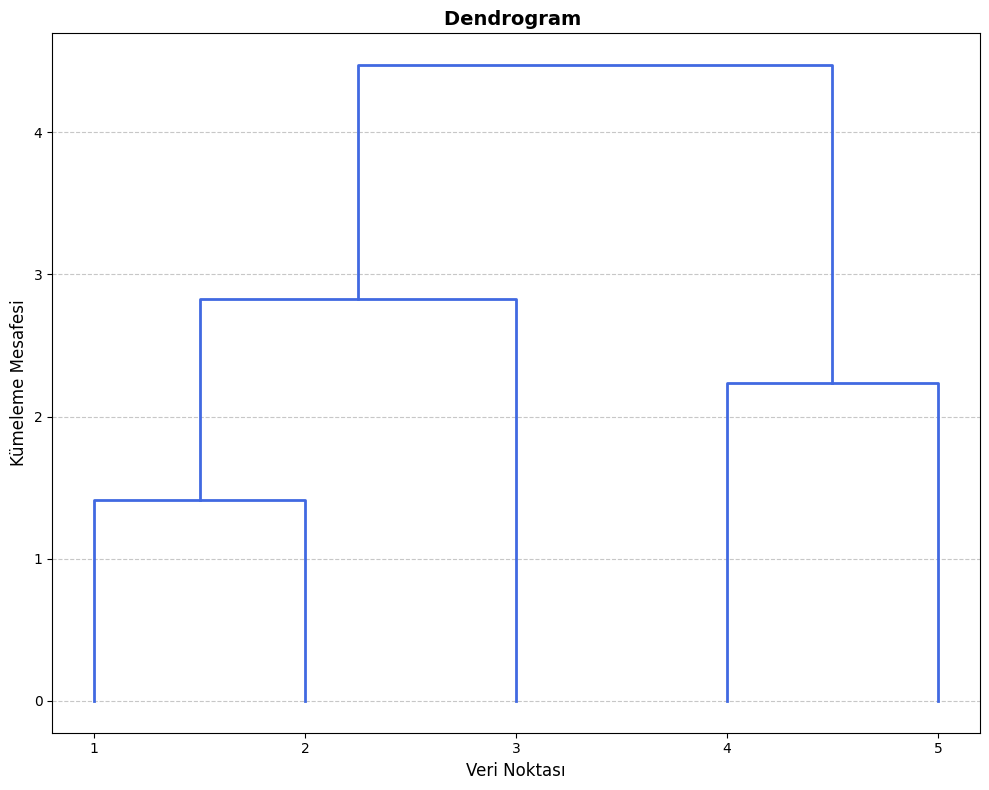

In [4]:
# Veri seti
file_path = input("Please Enter Your Dataset Path")

data = pd.read_csv(file_path)

# Linkage matrisini oluştur
linkage_matrix = hierarchical_clustering(data)

# Dendrogram'ı çiz
plot_dendrogram(linkage_matrix, labels=np.arange(1, len(data) + 1))

# Kümeleme için desired_clusters değerini ayarlayın (2'yi örnek olarak kullanıyoruz)
desired_clusters = 2

# Kümelemeyi gerçekleştirin
linkage_matrix = hierarchical_clustering(data)

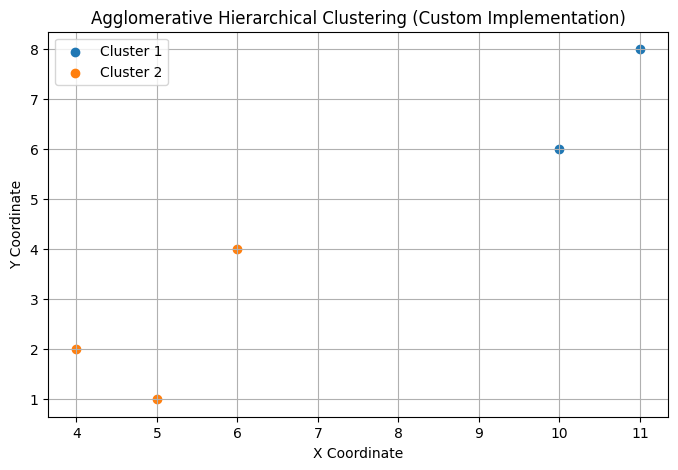

Cluster labels:
[2 2 2 1 1]


In [5]:
# Scipy'nin fcluster fonksiyonunu kullanarak etiketleri alın
from scipy.cluster.hierarchy import fcluster
labels = fcluster(linkage_matrix, t=desired_clusters, criterion='maxclust')

plt.figure(figsize=(8, 5))
plt.title("Agglomerative Hierarchical Clustering (Custom Implementation)")
for label in np.unique(labels):
    group = data[labels == label]
    # Access DataFrame columns using their names or .iloc
    plt.scatter(group.iloc[:, 0], group.iloc[:, 1], label=f'Cluster {label}')

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()

print(f"Cluster labels:\n{labels}")